In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date handling
from datetime import datetime


# New Section

In [ ]:
# Install the package if you haven't already
# pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# Fetch dataset (Online Retail: id=352)
online_retail = fetch_ucirepo(id=352)

# Access dataset as pandas DataFrame
df = online_retail.data.features

# Check first few rows
print(df.head())

# Metadata
print(online_retail.metadata)

# Variable information
print(online_retail.variables)


                           Description  Quantity     InvoiceDate  UnitPrice  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6  12/1/2010 8:26       2.55   
1                  WHITE METAL LANTERN         6  12/1/2010 8:26       3.39   
2       CREAM CUPID HEARTS COAT HANGER         8  12/1/2010 8:26       2.75   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6  12/1/2010 8:26       3.39   
4       RED WOOLLY HOTTIE WHITE HEART.         6  12/1/2010 8:26       3.39   

   CustomerID         Country  
0     17850.0  United Kingdom  
1     17850.0  United Kingdom  
2     17850.0  United Kingdom  
3     17850.0  United Kingdom  
4     17850.0  United Kingdom  
{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and re

In [ ]:

df = online_retail.data.features

print(df.head())
print(df.sample(4))
print(df.info())

                           Description  Quantity     InvoiceDate  UnitPrice  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6  12/1/2010 8:26       2.55   
1                  WHITE METAL LANTERN         6  12/1/2010 8:26       3.39   
2       CREAM CUPID HEARTS COAT HANGER         8  12/1/2010 8:26       2.75   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6  12/1/2010 8:26       3.39   
4       RED WOOLLY HOTTIE WHITE HEART.         6  12/1/2010 8:26       3.39   

   CustomerID         Country  
0     17850.0  United Kingdom  
1     17850.0  United Kingdom  
2     17850.0  United Kingdom  
3     17850.0  United Kingdom  
4     17850.0  United Kingdom  
                              Description  Quantity      InvoiceDate  \
243444      PACK OF 6 LARGE FRUIT STRAWS         12  6/29/2011 14:53   
138634    RECIPE BOX PANTRY YELLOW DESIGN        16  3/29/2011 16:40   
188885     SWEETHEART CERAMIC TRINKET BOX         4  5/13/2011 11:44   
227334  SET OF 3 CAKE TINS PANTRY DESIGN     

In [ ]:
df.columns

Index(['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country'],
      dtype='object')

In [ ]:
import pandas as pd

# Q1: Data Cleaning and Preparation

In [ ]:

# Remove duplicates
df.drop_duplicates(inplace=True)

print(df)

# Handle missing values: drop rows without CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

print(df)

# Filter negative or zero quantities and unit prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

print(df)

                                Description  Quantity      InvoiceDate  \
0        WHITE HANGING HEART T-LIGHT HOLDER         6   12/1/2010 8:26   
1                       WHITE METAL LANTERN         6   12/1/2010 8:26   
2            CREAM CUPID HEARTS COAT HANGER         8   12/1/2010 8:26   
3       KNITTED UNION FLAG HOT WATER BOTTLE         6   12/1/2010 8:26   
4            RED WOOLLY HOTTIE WHITE HEART.         6   12/1/2010 8:26   
...                                     ...       ...              ...   
541904          PACK OF 20 SPACEBOY NAPKINS        12  12/9/2011 12:50   
541905         CHILDREN'S APRON DOLLY GIRL          6  12/9/2011 12:50   
541906        CHILDRENS CUTLERY DOLLY GIRL          4  12/9/2011 12:50   
541907      CHILDRENS CUTLERY CIRCUS PARADE         4  12/9/2011 12:50   
541908        BAKING SET 9 PIECE RETROSPOT          3  12/9/2011 12:50   

        UnitPrice  CustomerID         Country  
0            2.55     17850.0  United Kingdom  
1            3.

In [ ]:

# Q1.2: Descriptive statistics
print(df[['Quantity', 'UnitPrice']].describe())
print(df[['Quantity', 'UnitPrice']].median())

# Convert InvoiceDate to datetime if not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

            Quantity      UnitPrice
count  392617.000000  392617.000000
mean       13.120260       3.126076
std       180.509714      22.243918
min         1.000000       0.001000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000
Quantity     6.00
UnitPrice    1.95
dtype: float64


# Q2: Sales Analysis

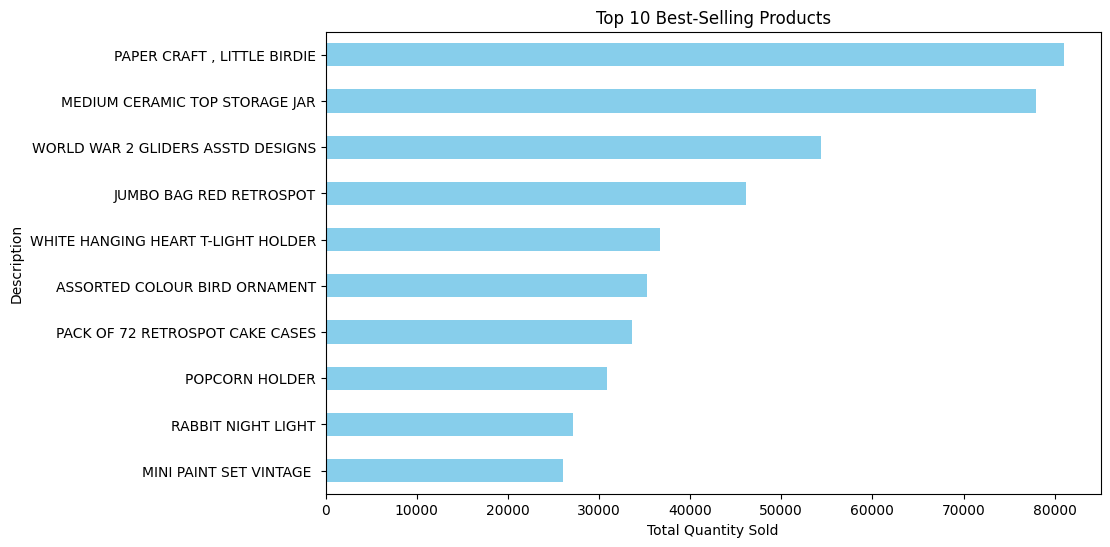

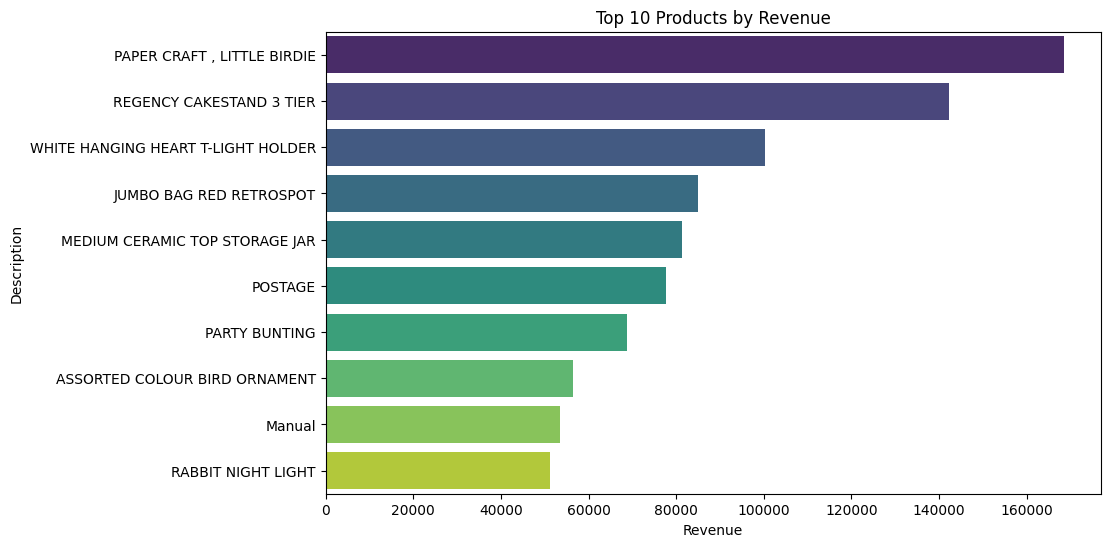

In [ ]:


# Q2.1: Top 10 Best-Selling Products by Quantity
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_products.plot(kind='barh', color='skyblue')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.gca().invert_yaxis()
plt.show()

# Q2.2: Total Revenue per Product
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
product_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=product_revenue.values, y=product_revenue.index, palette='viridis')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.show()

In [ ]:
print(df.columns)

Index(['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country', 'TotalPrice', 'Month'],
      dtype='object')


In [ ]:
# Total revenue per customer
customer_revenue = df.groupby('CustomerID')['TotalPrice'].sum()

# Average revenue per customer
avg_revenue_per_customer = customer_revenue.mean()
print(f"Average revenue per customer: {avg_revenue_per_customer:.2f}")

# Repeat customers: those with more than 1 transaction (count of rows as proxy)
customer_purchase_counts = df.groupby('CustomerID').size()
repeat_customers = customer_purchase_counts[customer_purchase_counts > 1].count()
repeat_sales_percentage = (repeat_customers / customer_purchase_counts.count()) * 100
print(f"Percentage of sales from repeat customers: {repeat_sales_percentage:.2f}%")


Average revenue per customer: 2048.31
Percentage of sales from repeat customers: 98.36%


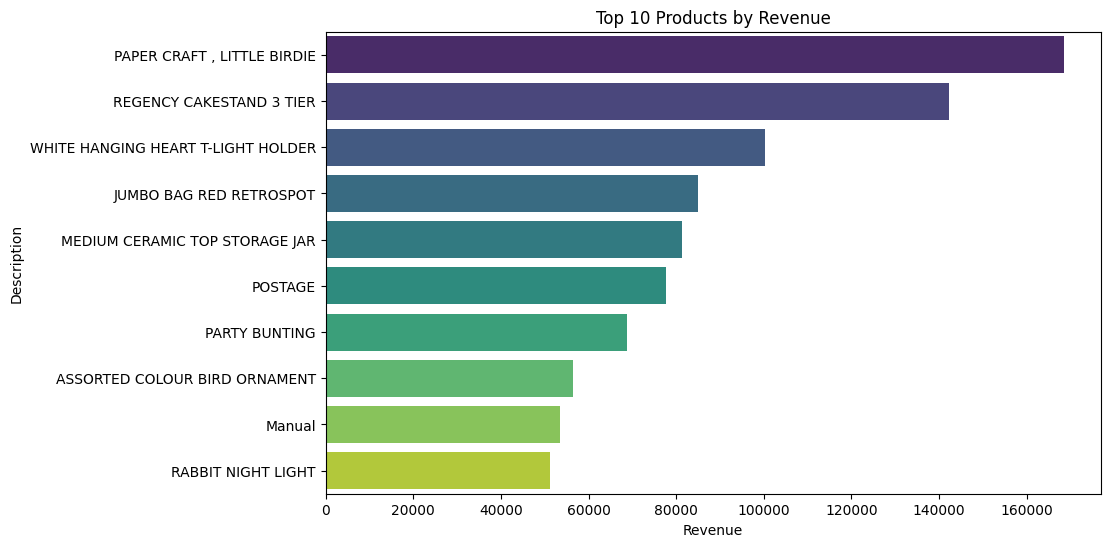

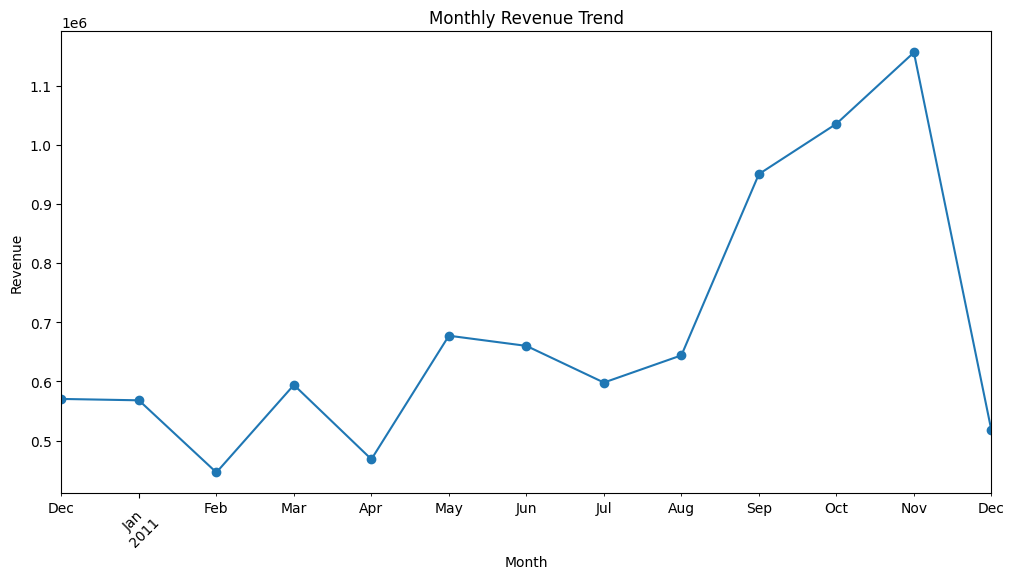

In [ ]:
# Q2.2: Total Revenue per Product
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
product_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=product_revenue.values, y=product_revenue.index, palette='viridis')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.show()

# Q2.3: Monthly Revenue Trend
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['TotalPrice'].sum()
plt.figure(figsize=(12,6))
monthly_revenue.plot(marker='o')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

# # Q3: Customer Behaviour

Unique Customers: 4338
Percentage of sales from repeat customers: 98.36%
Average revenue per customer: 2048.31


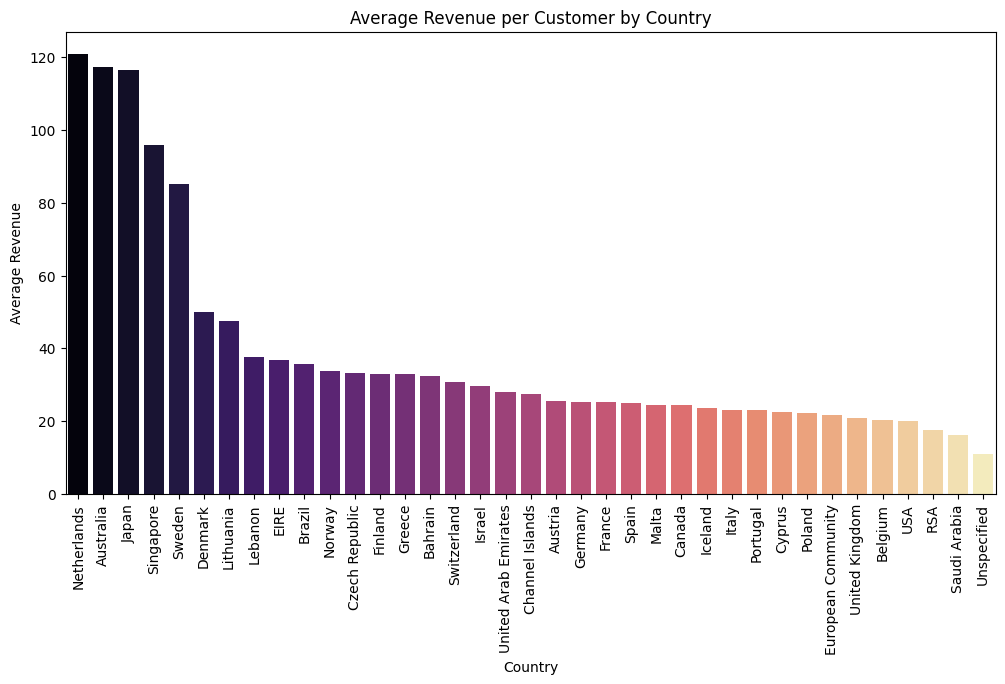

In [ ]:


# Unique Customers & Repeat Purchase Rate (based on CustomerID)
unique_customers = df['CustomerID'].nunique()
print(f"Unique Customers: {unique_customers}")

customer_purchase_counts = df.groupby('CustomerID').size()
repeat_customers = customer_purchase_counts[customer_purchase_counts > 1].count()
repeat_sales_percentage = (repeat_customers / unique_customers) * 100
print(f"Percentage of sales from repeat customers: {repeat_sales_percentage:.2f}%")

# Average Revenue per Customer
customer_revenue = df.groupby('CustomerID')['TotalPrice'].sum()
avg_revenue_per_customer = customer_revenue.mean()
print(f"Average revenue per customer: {avg_revenue_per_customer:.2f}")

# Country-wise average revenue per customer
country_avg_customer = df.groupby('Country')['TotalPrice'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=country_avg_customer.index, y=country_avg_customer.values, palette='magma')
plt.xticks(rotation=90)
plt.title("Average Revenue per Customer by Country")
plt.ylabel("Average Revenue")
plt.show()

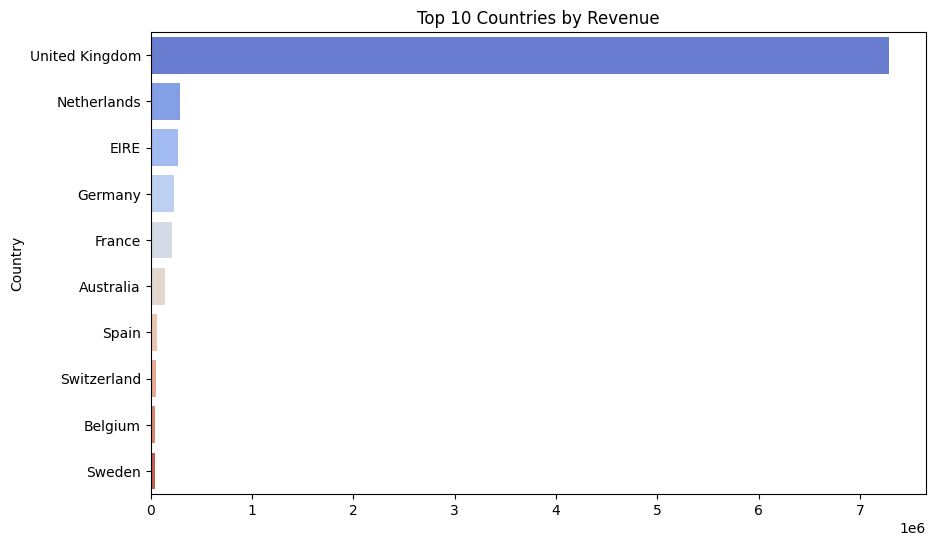

In [ ]:
# Q3.3: Countries Contributing Most to Revenue
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='coolwarm')
plt.title("Top 10 Countries by Revenue")
plt.show()

# Q4: Product Performance

Top 5 Countries by Average Revenue per Customer:
Country
Netherlands    121.003111
Australia      117.234386
Japan          116.561900
Singapore       95.852658
Sweden          85.261844
Name: TotalPrice, dtype: float64


<Figure size 1500x700 with 0 Axes>

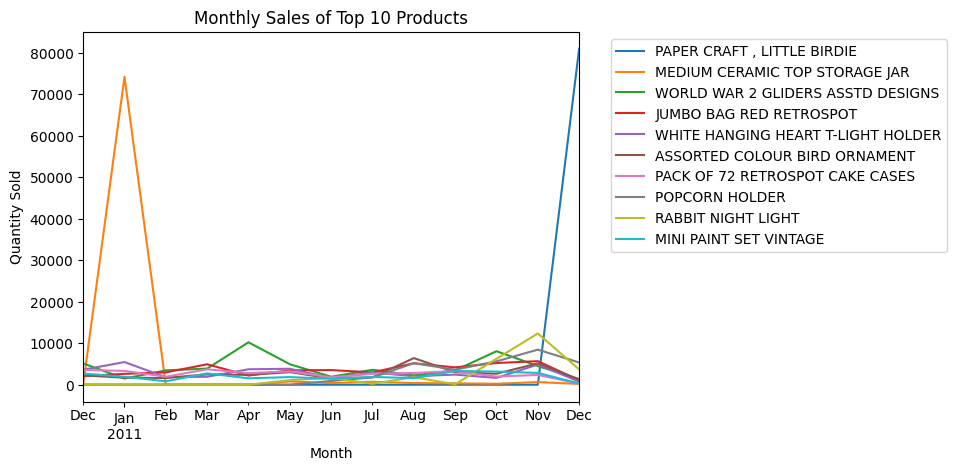

In [ ]:


# Top 5 Countries by Avg Revenue per Transaction (using CustomerID as proxy)
country_avg_transaction = df.groupby('Country')['TotalPrice'].mean().sort_values(ascending=False).head(5)
print("Top 5 Countries by Average Revenue per Customer:")
print(country_avg_transaction)

# Seasonal/Monthly Product Performance (Top 10 products)
monthly_product_sales = df.groupby(['Month', 'Description'])['Quantity'].sum().unstack().fillna(0)
monthly_product_sales_top10 = monthly_product_sales[top_products.index]  # Focus top 10 products
plt.figure(figsize=(15,7))
monthly_product_sales_top10.plot()
plt.title("Monthly Sales of Top 10 Products")
plt.ylabel("Quantity Sold")
plt.xlabel("Month")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()